In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC






In [2]:
# Reading the dataset from a CSV file
df = pd.read_csv('C:\\GitHub\\breast_cancer\\data.csv')

In [3]:
# Print the number of rows in the dataset
print('Number of Rows in Diabetes dataset:', df.shape[0])
# Print the number of columns in the dataset
print('Number of Columns in Diabetes dataset:', df.shape[1])
# Print the size (total number of elements) of the dataset
print('Size of Diabetes dataset is  :',df.size)

Number of Rows in Diabetes dataset: 569
Number of Columns in Diabetes dataset: 32
Size of Diabetes dataset is  : 18208


In [4]:
# Get the column names of the DataFrame
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [6]:
# Print the shape again to check if there are any duplicate entries
print('Shape of the dataframe is', df.shape)

Shape of the dataframe is (569, 32)


In [7]:
# Check for null entries in any columns
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

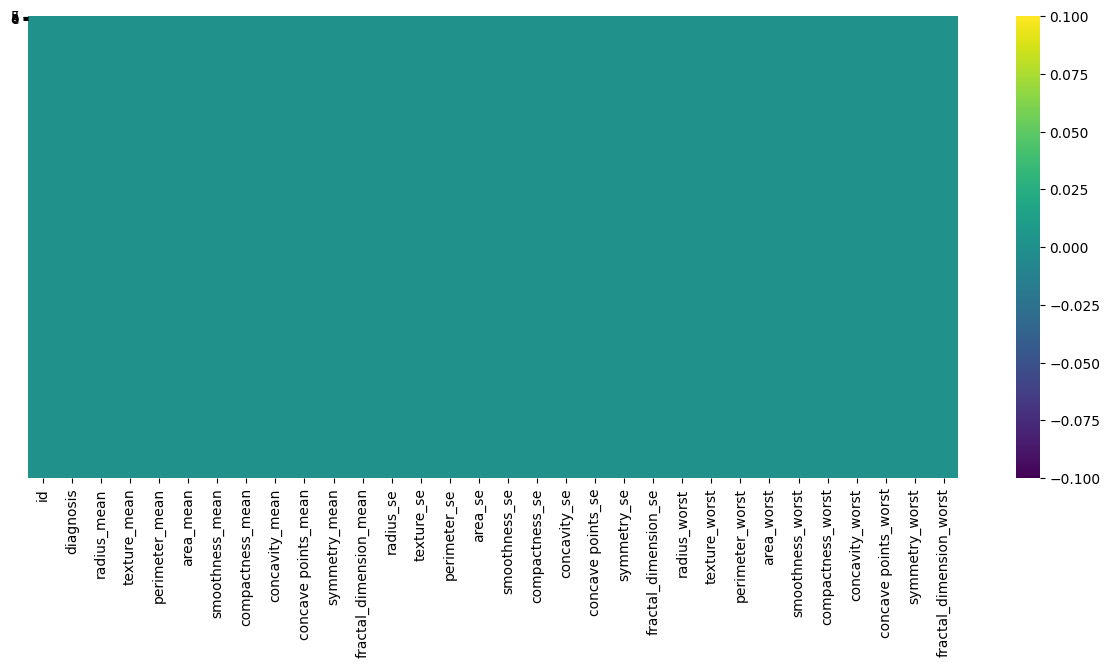

In [8]:
# Create a heatmap to visualize missing values in the DataFrame
plt.figure(figsize = (15,6))
sns.heatmap(df.isnull(), yticklabels = 'False', cmap = 'viridis')

In [9]:
# Print first five entries in dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


C:\Users\Purvesh\AppData\Local\Temp\ipykernel_38048\1686235404.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = df.corr()


<Axes: >

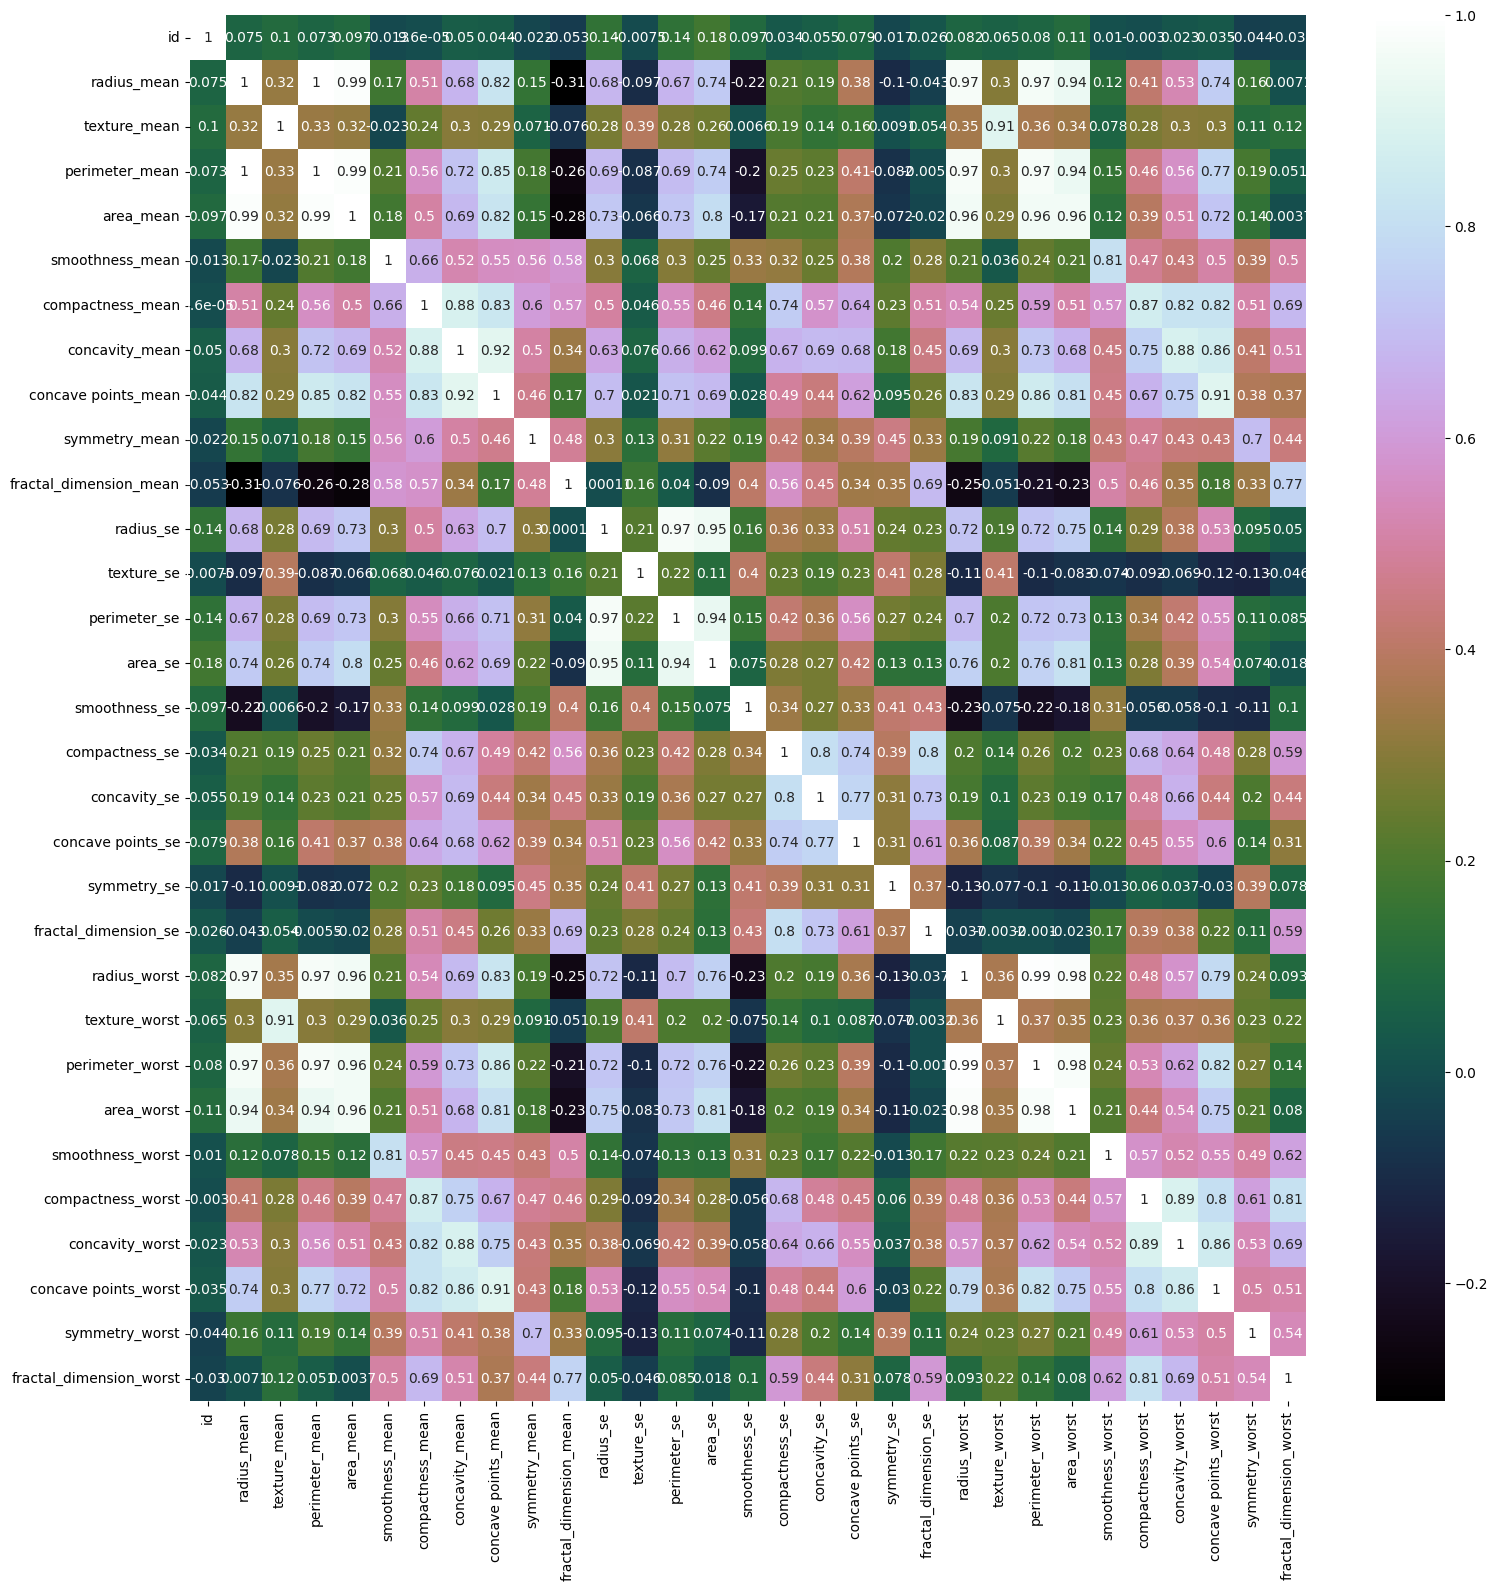

In [10]:
# calculate the co-relation matrix
cor_mat = df.corr()

# Create a heatmap of the correlation matrix with annotations
plt.figure(figsize = (18,18))
sns.heatmap(cor_mat, annot = True, cmap = 'cubehelix')

In [11]:
# Calculate the correlation matrix
cor_mat = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(cor_mat)

Correlation Matrix:
                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se           

C:\Users\Purvesh\AppData\Local\Temp\ipykernel_38048\3653552249.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = df.corr()


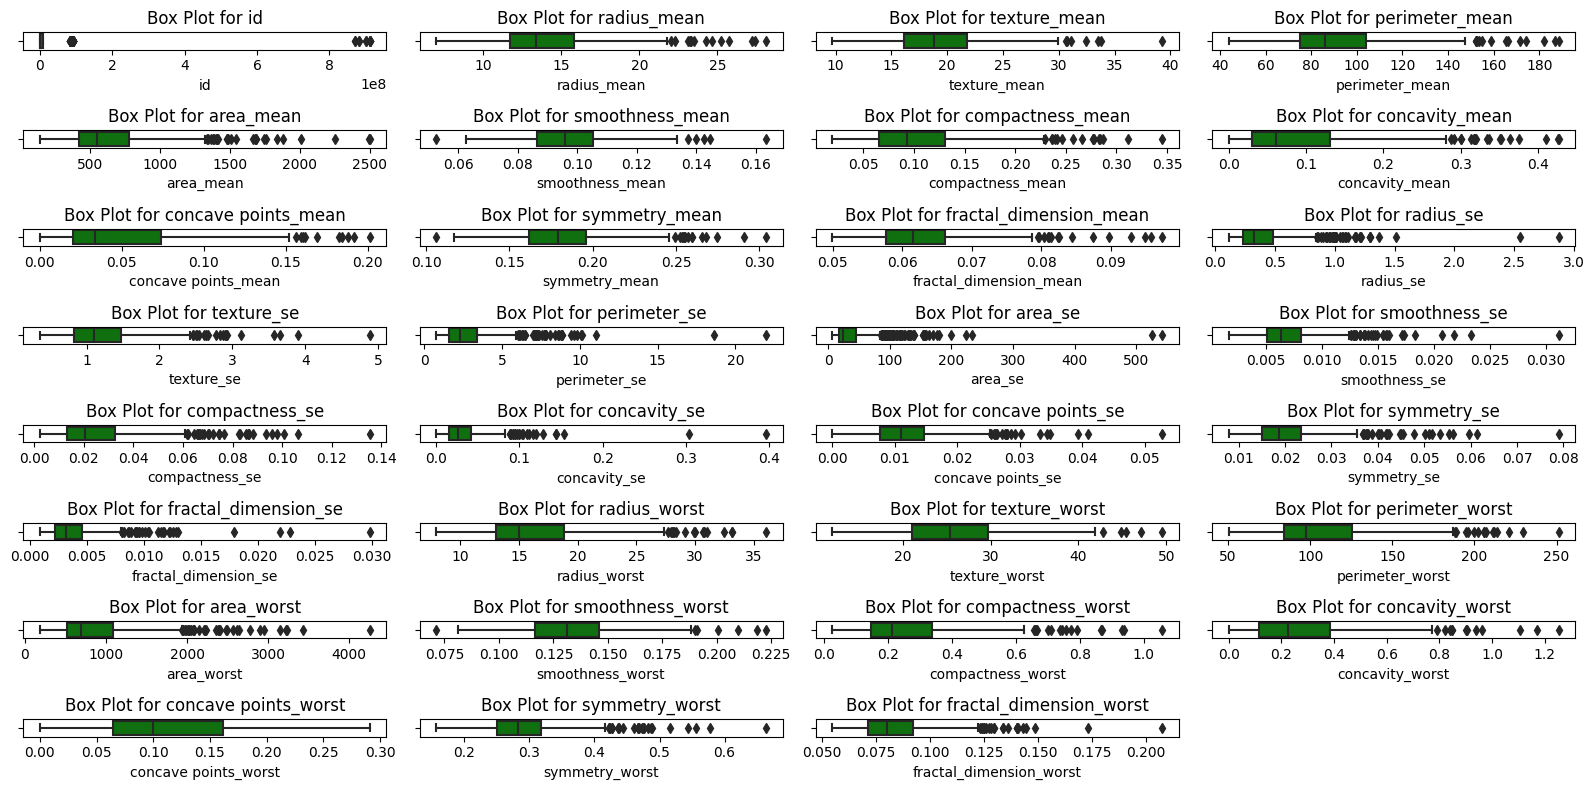

In [13]:
x = df.drop(['diagnosis'], axis=1)  # Drop the dependent feature

# Create a larger plot grid for multiple box plots
plt.figure(figsize=(16, 8))

# Iterate through each column in x
for i, column in enumerate(x.columns, 1):
    plt.subplot(8, 4, i)  # Create a subplot in a 2x4 grid
    sns.boxplot(x=column, data=x, color='green', showfliers=True)  # Include outliers
    plt.xlabel(column)
    plt.title(f'Box Plot for {column}')

# Adjust the layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=pd.DataFrame(X)
df_new.head()

C:\Users\Purvesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (569). n_quantiles is set to n_samples.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.072183,0.837148,0.001761,0.864437,0.839789,0.945423,0.991197,0.973592,0.972711,0.973592,...,0.945423,0.077465,0.970951,0.952465,0.901408,0.978873,0.968310,0.985915,0.975352,0.947183
1,0.073944,0.948944,0.390845,0.928697,0.955986,0.218310,0.389085,0.602113,0.739437,0.536972,...,0.934859,0.392606,0.904049,0.943662,0.362676,0.406690,0.524648,0.836268,0.445423,0.700704
2,0.859155,0.911972,0.696303,0.909331,0.906690,0.839789,0.860035,0.891725,0.954225,0.838908,...,0.897887,0.517606,0.885563,0.906690,0.730634,0.883803,0.822183,0.957746,0.904049,0.674296
3,0.860915,0.205986,0.639085,0.302817,0.174296,0.996479,0.994718,0.945423,0.911972,0.991197,...,0.492958,0.591549,0.517606,0.355634,0.996479,0.992958,0.952465,0.978873,1.000000,0.998239
4,0.862676,0.934859,0.110915,0.947183,0.943662,0.627641,0.774648,0.896127,0.909331,0.529930,...,0.864437,0.051056,0.879401,0.866197,0.594190,0.475352,0.778169,0.752641,0.157570,0.396127


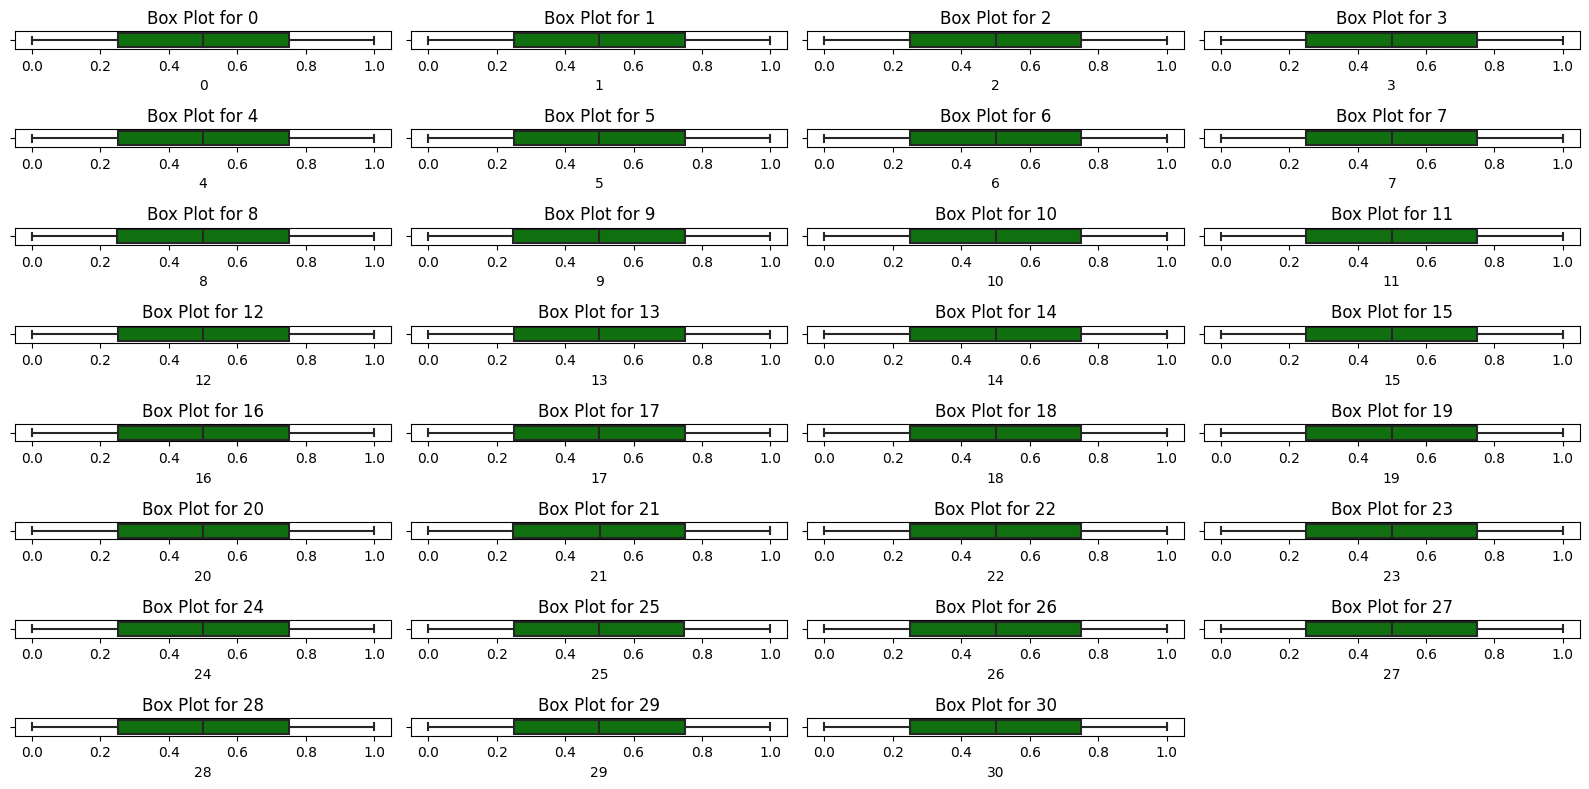

In [15]:
# Create a larger plot grid for multiple box plots
plt.figure(figsize=(16, 8))

# Iterate through each column in x
for i, column in enumerate(df_new.columns, 1):
    plt.subplot(8, 4, i)  # Create a subplot in a 2x4 grid
    sns.boxplot(x=column, data=df_new, color='green', showfliers=True)  # Include outliers
    plt.xlabel(column)
    plt.title(f'Box Plot for {column}')

# Adjust the layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

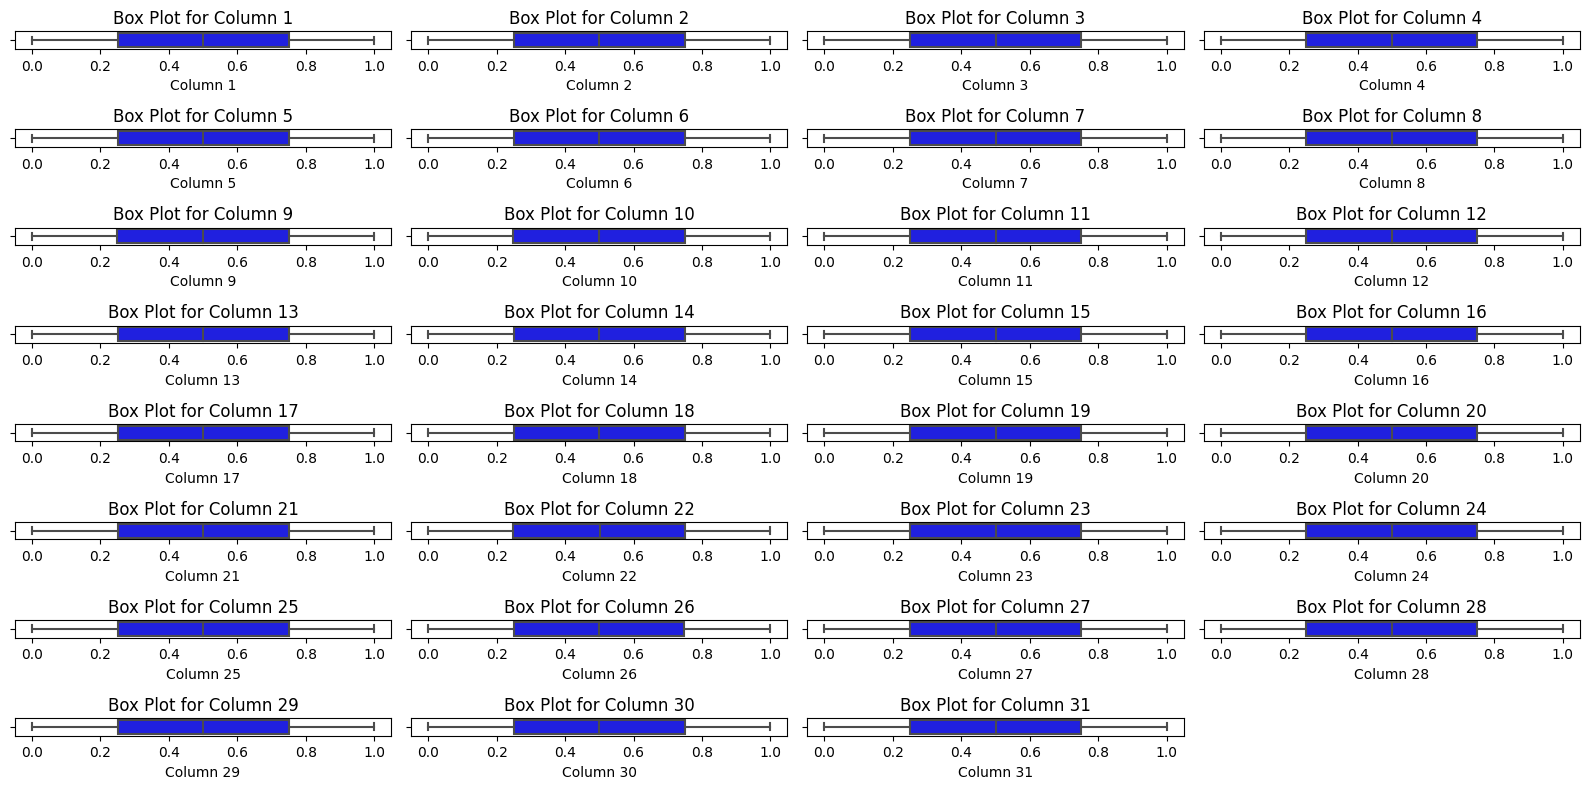

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a larger plot grid for multiple box plots
plt.figure(figsize=(16, 8))

# Iterate through each column in df_new
for i, column in enumerate(df_new.columns, 1):
    plt.subplot(8, 4, i)  # Create a subplot in a 2x4 grid (adjust as needed)
    sns.boxplot(x=df_new[column], color='blue', showfliers=True)  # Include outliers
    plt.xlabel(f'Column {i}')
    plt.title(f'Box Plot for Column {i}')

# Adjust the layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


In [19]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "diagnosis" column
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Now, the "diagnosis" column contains 0 for "B" (benign) and 1 for "M" (malignant)


In [20]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
# Extracting independent features (X) by dropping the 'Diagnosis' column
X = df_new

# Extracting the dependent variable (Y) which is 'Outcome'
y = df['diagnosis']

In [24]:
# Splitting the dataset into training and testing sets
# X_train: features for training, X_test: features for testing
# y_train: labels for training, y_test: labels for testing
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = 0.8, random_state = 12)

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 31), (455,), (114, 31), (114,))

In [27]:
# Create and train the Logistic Regression model
logic = LogisticRegression()
logic.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logic.predict(X_test)

# Calculate and print the training accuracy
log_train = round(logic.score(X_train, y_train) * 100, 2)
print(f"Training Accuracy: {log_train}%")

# Calculate and print the model accuracy score
log_accuracy = round(accuracy_score(y_test, y_pred_lr) * 100, 2)
print(f"Model Accuracy Score: {log_accuracy}%")

# Print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_lr)
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion Matrix:")
print(confusion_mat)
print("\033[1m--------------------------------------------------------\033[0m")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))


Training Accuracy: 97.36%
Model Accuracy Score: 96.49%
--------------------------------------------------------
Confusion Matrix:
[[65  1]
 [ 3 45]]
--------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        66
           1       0.98      0.94      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [28]:
input_data = np.array([[862485,11.6,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.0335,0.162,0.06582,0.2315,0.5391,1.475,15.75,0.006153,0.0133,0.01693,0.006884,0.01651,0.002551,13.06,17.16,82.96,512.5,0.1431,0.1851,0.1922,0.08449,0.2772,0.08756
]])
predictions = logic.predict(input_data)
print(predictions)
if predictions[0] == 1:
    print("The patient is predicted to have cancer.")
else:
    print("The patient is predicted to not have cancer.")

[0]
The patient is predicted to not have cancer.


In [29]:
# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Create the GridSearchCV object
grid_search_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)

# Fit the grid search to the training data
grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params_lr = grid_search_lr.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_lr)

Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}


In [30]:
# Create and train the Logistic Regression model with the best hyperparameters
best_logic = LogisticRegression(solver='liblinear', **best_params_lr)
best_logic.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_lr = best_logic.predict(X_test)

# Calculate and print the training accuracy
best_log_train = round(best_logic.score(X_train, y_train) * 100, 2)
print(f"Training Accuracy with Best Hyperparameters: {best_log_train}%")

# Calculate and print the model accuracy score
best_log_accuracy = round(accuracy_score(y_test, y_pred_best_lr) * 100, 2)
print(f"Model Accuracy Score with Best Hyperparameters: {best_log_accuracy}%")

# Print the confusion matrix
best_confusion_mat_lr = confusion_matrix(y_test, y_pred_best_lr)
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion Matrix with Best Hyperparameters (Logistic Regression):")
print(best_confusion_mat_lr)
print("\033[1m--------------------------------------------------------\033[0m")

# Print the classification report
print("Classification Report with Best Hyperparameters (Logistic Regression):")
print(classification_report(y_test, y_pred_best_lr))

Training Accuracy with Best Hyperparameters: 97.36%
Model Accuracy Score with Best Hyperparameters: 97.37%
--------------------------------------------------------
Confusion Matrix with Best Hyperparameters (Logistic Regression):
[[65  1]
 [ 2 46]]
--------------------------------------------------------
Classification Report with Best Hyperparameters (Logistic Regression):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        66
           1       0.98      0.96      0.97        48

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [31]:
from sklearn.svm import SVC

# Define the hyperparameters and their possible values for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1]
}

# Create the GridSearchCV object for SVM
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)

# Fit the grid search to the training data for SVM
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters from the grid search for SVM
best_params_svm = grid_search_svm.best_params_
print("Best Hyperparameters for SVM:", best_params_svm)

# Create and train the SVM model with the best hyperparameters
best_svm = SVC(**best_params_svm)
best_svm.fit(X_train, y_train)

# Make predictions on the test set for SVM
y_pred_best_svm = best_svm.predict(X_test)

# Calculate and print the training accuracy for SVM
best_svm_train = round(best_svm.score(X_train, y_train) * 100, 2)
print(f"Training Accuracy with Best Hyperparameters (SVM): {best_svm_train}%")

# Calculate and print the model accuracy score for SVM
best_svm_accuracy = round(accuracy_score(y_test, y_pred_best_svm) * 100, 2)
print(f"Model Accuracy Score with Best Hyperparameters (SVM): {best_svm_accuracy}%")

# Print the confusion matrix for SVM
best_confusion_mat_svm = confusion_matrix(y_test, y_pred_best_svm)
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion Matrix with Best Hyperparameters (SVM):")
print(best_confusion_mat_svm)
print("\033[1m--------------------------------------------------------\033[0m")

# Print the classification report for SVM
print("Classification Report with Best Hyperparameters (SVM):")
print(classification_report(y_test, y_pred_best_svm))


Best Hyperparameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Training Accuracy with Best Hyperparameters (SVM): 100.0%
Model Accuracy Score with Best Hyperparameters (SVM): 95.61%
--------------------------------------------------------
Confusion Matrix with Best Hyperparameters (SVM):
[[65  1]
 [ 4 44]]
--------------------------------------------------------
Classification Report with Best Hyperparameters (SVM):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        66
           1       0.98      0.92      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

